In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam/spamraw.csv


In [2]:
import re

import matplotlib.pyplot as plt 
import seaborn as sns
from string import punctuation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB

In [3]:
sms =  pd.read_csv('/kaggle/input/sms-spam/spamraw.csv')

In [4]:
sms.head(10)

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
5,ham,Aiya we discuss later lar... Pick u up at 4 is...
6,ham,Are you this much buzy
7,ham,Please ask mummy to call father
8,spam,Marvel Mobile Play the official Ultimate Spide...
9,ham,"fyi I'm at usf now, swing by the room whenever"


In [5]:
sms.type.value_counts()

ham     4812
spam     747
Name: type, dtype: int64

In [6]:
together = "".join(sms['text'])
ham_sms = " ".join(sms.loc[sms['type']=="ham",'text'])
spam_sms = " ".join(sms.loc[sms['type']=="spam",'text'])
#together

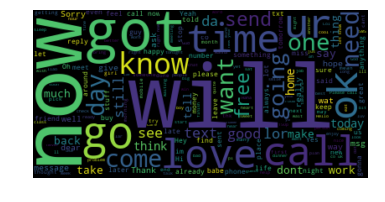

In [7]:
wordcloud = WordCloud().generate(together)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

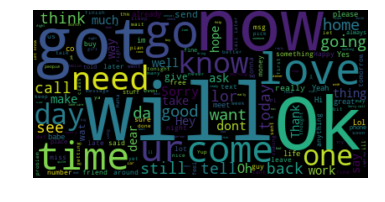

In [8]:
wordcloud = WordCloud().generate(ham_sms)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

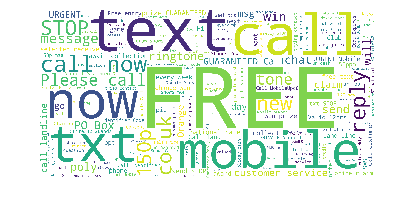

In [9]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=4000,height=2000).generate(spam_sms)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [10]:
stop = set(stopwords.words('english')+list('punctuation'))
len(stop)

183

In [11]:
lemma = WordNetLemmatizer()
ps = PorterStemmer()

In [12]:
def split_into_lemmas(message):
    message = message.lower()
    # remove special characters, numbers, punctuations
    message =re.sub("[^a-zA-Z ]+", " ", message)
    #Removing Short Words
    #message = message.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    #tokenization, separating words from sentences
    message = word_tokenize(message)
    #stemming : Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word
    words = [ps.stem(m) for m in message]
    #[stemmer.stem(plural) for plural in plurals]
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]
    

In [13]:
Y = sms['type']
X = sms['text']
X.head()

0    Hope you are having a good week. Just checking in
1                              K..give back my thanks.
2          Am also doing in cbe only. But have to pay.
3    complimentary 4 STAR Ibiza Holiday or £10,000 ...
4    okmail: Dear Dave this is your final notice to...
Name: text, dtype: object

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4447,), (1112,), (4447,), (1112,))

In [16]:
tfidf_vectorizer = TfidfVectorizer(analyzer=split_into_lemmas, max_df = 0.9, min_df = 5, max_features = 500, stop_words=stop)
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit(x_train)

In [17]:
tfidf.get_feature_names()

['abl',
 'abt',
 'account',
 'actual',
 'address',
 'aft',
 'afternoon',
 'age',
 'ah',
 'aight',
 'alreadi',
 'alright',
 'also',
 'alway',
 'ani',
 'anoth',
 'answer',
 'anyth',
 'anyway',
 'appli',
 'ard',
 'around',
 'ask',
 'attempt',
 'await',
 'award',
 'away',
 'awesom',
 'b',
 'babe',
 'babi',
 'back',
 'bad',
 'bank',
 'bath',
 'beauti',
 'becaus',
 'bed',
 'befor',
 'believ',
 'best',
 'better',
 'big',
 'birthday',
 'bit',
 'bonu',
 'book',
 'bore',
 'box',
 'boy',
 'break',
 'bring',
 'brother',
 'bt',
 'bu',
 'busi',
 'buy',
 'c',
 'call',
 'came',
 'camera',
 'cant',
 'car',
 'care',
 'cash',
 'caus',
 'chanc',
 'chang',
 'charg',
 'chat',
 'check',
 'choos',
 'claim',
 'class',
 'close',
 'club',
 'co',
 'code',
 'collect',
 'colour',
 'com',
 'come',
 'complet',
 'contact',
 'content',
 'cool',
 'cost',
 'could',
 'coz',
 'credit',
 'custom',
 'da',
 'dad',
 'dat',
 'date',
 'day',
 'de',
 'dear',
 'decid',
 'decim',
 'deliveri',
 'den',
 'detail',
 'di',
 'didnt',
 'd

In [18]:
train1 = tfidf.transform(x_train)
test1 = tfidf.transform(x_test)
train1.shape, test1.shape

((4447, 500), (1112, 500))

In [19]:
clf= MultinomialNB()
clf.fit(train1, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
predictions=pd.DataFrame(list(zip(y_test,clf.predict(test1))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham,spam
real,,
ham,951,5
spam,30,126


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
pred =clf.predict(test1)
pred

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [23]:
accuracy_score(y_test,pred )

0.9685251798561151